## Census API

In [8]:
import requests
import pandas as pd
import config

%matplotlib inline

In [9]:
base = 'https://api.census.gov/data/timeseries/intltrade/'
key = config.census_key
param = 'CTY_CODE,CTY_NAME,ALL_VAL_MO'
time = '2017-06'
flow = 'exports'
url = '{}{}/hs?get={}&key={}&time={}'.format(base, flow, param, key, time)

In [10]:
r = requests.get(url).json()

In [11]:
df = pd.DataFrame(r)
df = df.rename(columns=df.iloc[0])
df = df.reindex(df.index.drop(0))
df['ALL_VAL_MO'] = df['ALL_VAL_MO'].astype(float)
d = {}
for cty in ['CANADA', 'MEXICO', 'CHINA', 'BRAZIL', 'JAPAN', 'GERMANY', 'FRANCE']:
    d[cty] = int(df[df['CTY_NAME'] == cty]['ALL_VAL_MO'].item())

In [12]:
df[(df['CTY_CODE'].str[0] !='0') & (df['CTY_CODE'].str[1] != 'X')][1:].sort_values('ALL_VAL_MO', ascending=False)

,CTY_CODE,CTY_NAME,ALL_VAL_MO,time
3,1220,CANADA,2.524057e+10,2017-06
5,2010,MEXICO,2.135054e+10,2017-06
144,5700,CHINA,9.710267e+09,2017-06
150,5880,JAPAN,5.594960e+09,2017-06
58,4120,UNITED KINGDOM,4.676395e+09,2017-06
66,4280,GERMANY,4.496456e+09,2017-06
147,5800,"KOREA, SOUTH",4.226968e+09,2017-06
148,5820,HONG KONG,4.017519e+09,2017-06
60,4210,NETHERLANDS,3.492511e+09,2017-06
46,3510,BRAZIL,2.952364e+09,2017-06


In [13]:
exp = pd.DataFrame(d, index=[flow]).T.sort_values(flow)

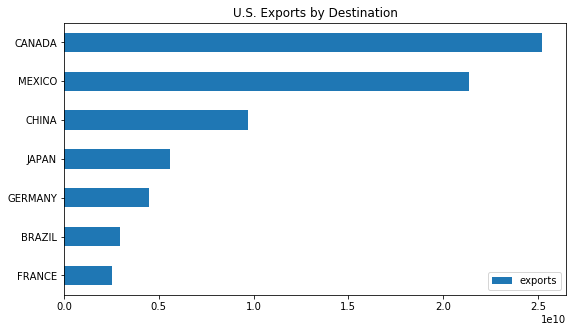

In [14]:
exp.plot(kind='barh', figsize=(9,5), title='U.S. Exports by Destination')